In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


base_dir = './local/video/01'
file_list = os.listdir(base_dir)

data = {}
data["Average RTT(ms)"] = []
data["Average Interaction Delay (ms)"] = []
data["Average Throughput (Mbps)"] = []
data["Schemes"] = []

NAME_MAPPING = {
    "MONAX": "Monax (Ours)",
    "VEGAS": "Vegas",
    "CUBIC": "Cubic",
    "PCC-ALLEGRO": "PCC Allegro",
    "PCC-VIVACE": "PCC Vivace",
    "BBR": "BBR"
}

for file in file_list:
    if('csv' in file):
        CC = file.split('_')[0].upper()
        df = pd.read_csv(os.path.join(base_dir,file))
        RTT_average = df['RTT_average'].values
        end2end_average = df['end2end_average'].values
        delivery_rate_average = df['delivery_rate_average'].values
        
        data["Average RTT(ms)"]+=list(RTT_average)
        data["Average Interaction Delay (ms)"]+=list(end2end_average)
        data["Average Throughput (Mbps)"]+=list(delivery_rate_average)
        data["Schemes"]+=[NAME_MAPPING[CC] for i in range(len(end2end_average))]




    
    

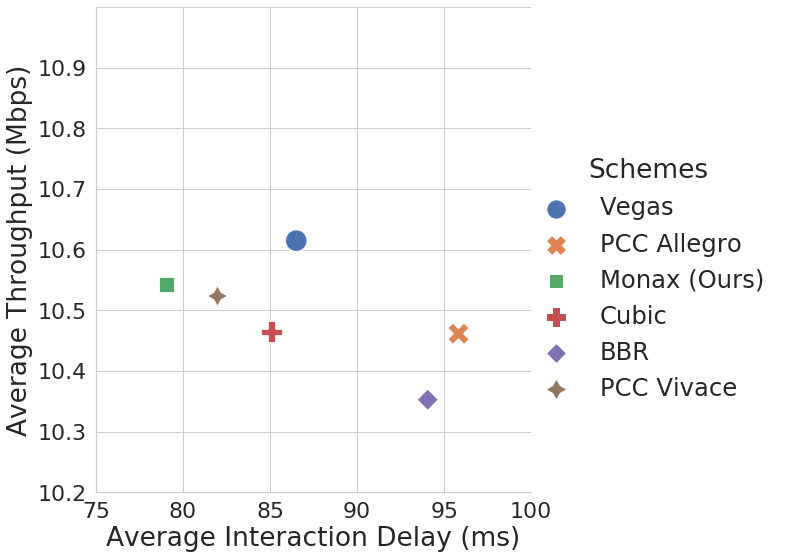

In [149]:
X_LIMIT = (70, 120)
Y_LIMIT = (10, 11.5)

sns.set(font_scale=2.2)
sns.set_style("whitegrid")
# tips = {}
# tips['Latency'] = [1,2,3,4,5,6,7,8,9,10]
# tips['Throughput'] =ii [10,9,8,7,6,5,4,3,2,1]
# tips['CC'] = ['BBR', 'CUBIC', 'Vivace', 'CUBIC','BBR', 'CUBIC', 'Allegro','BBR', 'CUBIC','BBR']
# tips = pd.DataFrame(tips)


g = sns.relplot(x="Average Interaction Delay (ms)", y="Average Throughput (Mbps)", hue='Schemes', style='Schemes', height=8, data=data, s=500);
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [300] 
    
g.set(xlim=X_LIMIT,ylim=Y_LIMIT)
g.set_xticklabels(fontsize=22)
g.set_yticklabels(fontsize=22)

g.savefig("./01.png", dpi = 400)    
# plt.xlim(0)
# plt.ylim(38,46)